In [5]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras import datasets,layers,models
from keras.utils import np_utils
from keras import regularizers
from keras.layers import BatchNormalization, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [4]:
(train_images,train_labels),(test_images,test_labels)=datasets.cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [6]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [7]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
               

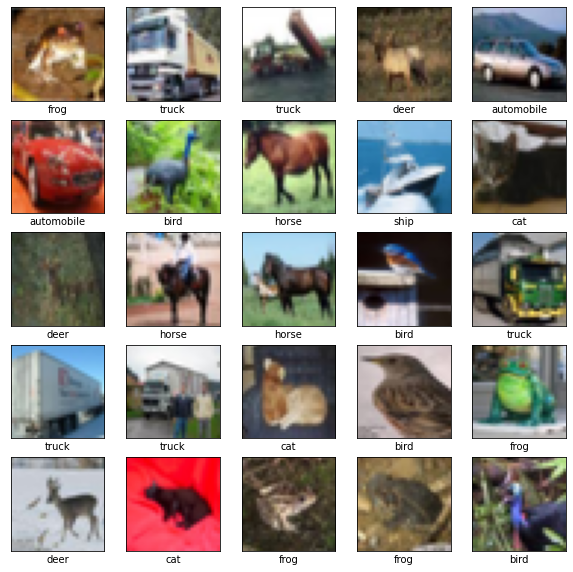

In [8]:
plt.figure(figsize=[10,10])
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i],cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [9]:
train_images=train_images.astype("float32")
test_images=test_images.astype("float32")

train_images/=255
test_images/=255

num_classes=10

train_labels=np_utils.to_categorical(train_labels,num_classes)
test_labels=np_utils.to_categorical(test_labels,num_classes)


In [10]:
from keras.layers.pooling import MaxPooling2D
model=Sequential()

model.add(layers.Conv2D(32,(3,3),padding="same", activation="relu", input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,(3,3), padding="same", activation="relu"))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(layers.Conv2D(64,(3,3), padding="same", activation="relu"))
model.add(BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128,(3,3), padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(layers.Conv2D(128,(3,3), padding="same",activation="relu"))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128,activation="relu"))
model.add(BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation="softmax"))

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_7 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_8 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [11]:
model.compile(optimizer="adam", loss=keras.losses.categorical_crossentropy,metrics=["accuracy"])


In [12]:
history=model.fit(train_images,train_labels,batch_size=64, epochs=100,validation_data=(test_images, test_labels))

Epoch 1/100
782/782 [==============================] - 18s 11ms/step - loss: 1.7464 - accuracy: 0.4026 - val_loss: 1.2361 - val_accuracy: 0.5496
Epoch 2/100
782/782 [==============================] - 9s 12ms/step - loss: 1.2064 - accuracy: 0.5652 - val_loss: 1.1379 - val_accuracy: 0.6010
Epoch 3/100
782/782 [==============================] - 8s 10ms/step - loss: 1.0308 - accuracy: 0.6373 - val_loss: 0.8490 - val_accuracy: 0.6994
Epoch 4/100
782/782 [==============================] - 8s 10ms/step - loss: 0.9071 - accuracy: 0.6831 - val_loss: 0.8483 - val_accuracy: 0.7090
Epoch 5/100
782/782 [==============================] - 8s 10ms/step - loss: 0.8423 - accuracy: 0.7060 - val_loss: 0.6961 - val_accuracy: 0.7591
Epoch 6/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7781 - accuracy: 0.7286 - val_loss: 0.7263 - val_accuracy: 0.7527
Epoch 7/100
782/782 [==============================] - 8s 10ms/step - loss: 0.7384 - accuracy: 0.7446 - val_loss: 0.8865 - val_accuracy

Text(0.5, 1.0, 'Loss Curves')

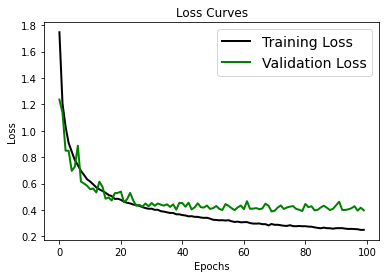

In [13]:
plt.figure(figsize=[6,4])
plt.plot(history.history["loss"],'black',linewidth=2.0)
plt.plot(history.history["val_loss"],'green',linewidth=2.0)
plt.legend(["Training Loss","Validation Loss"],fontsize=14)
plt.xlabel("Epochs",fontsize=10)
plt.ylabel("Loss", fontsize=10)
plt.title("Loss Curves",fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

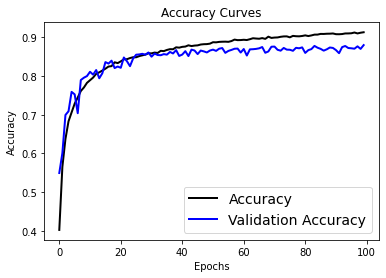

In [14]:
plt.figure(figsize=[6,4])
plt.plot(history.history["accuracy"], 'black',linewidth=2.0)
plt.plot(history.history["val_accuracy"],"blue",linewidth=2.0)
plt.legend(["Accuracy", "Validation Accuracy"], fontsize=14)
plt.xlabel("Epochs" , fontsize=10)
plt.ylabel("Accuracy", fontsize=10)
plt.title("Accuracy Curves",fontsize=12)


In [15]:
# Making the Predictions
pred = model.predict(test_images)
print(pred)

# Converting the predictions into label index 
pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

313/313 [==============================] - 1s 3ms/step
[[3.3943568e-06 1.9262002e-07 2.1394420e-05 ... 1.7570571e-06
  1.2815160e-06 1.4213438e-07]
 [2.7860817e-06 2.5493030e-03 6.0709354e-11 ... 6.7010021e-13
  9.9744749e-01 4.8729822e-07]
 [5.6337460e-04 2.4525216e-01 6.9551820e-06 ... 3.5641662e-07
  7.5367475e-01 4.5859109e-04]
 ...
 [8.9831245e-09 2.7982137e-09 9.1387934e-05 ... 2.5792151e-05
  3.3033412e-08 1.8676928e-08]
 [5.1424728e-04 9.9917346e-01 1.1917883e-04 ... 2.3920077e-06
  1.4299624e-05 4.5760895e-05]
 [3.5031054e-08 4.3298414e-09 2.1820295e-08 ... 9.9992120e-01
  4.9328146e-09 8.5693515e-09]]
[3 8 8 ... 5 1 7]


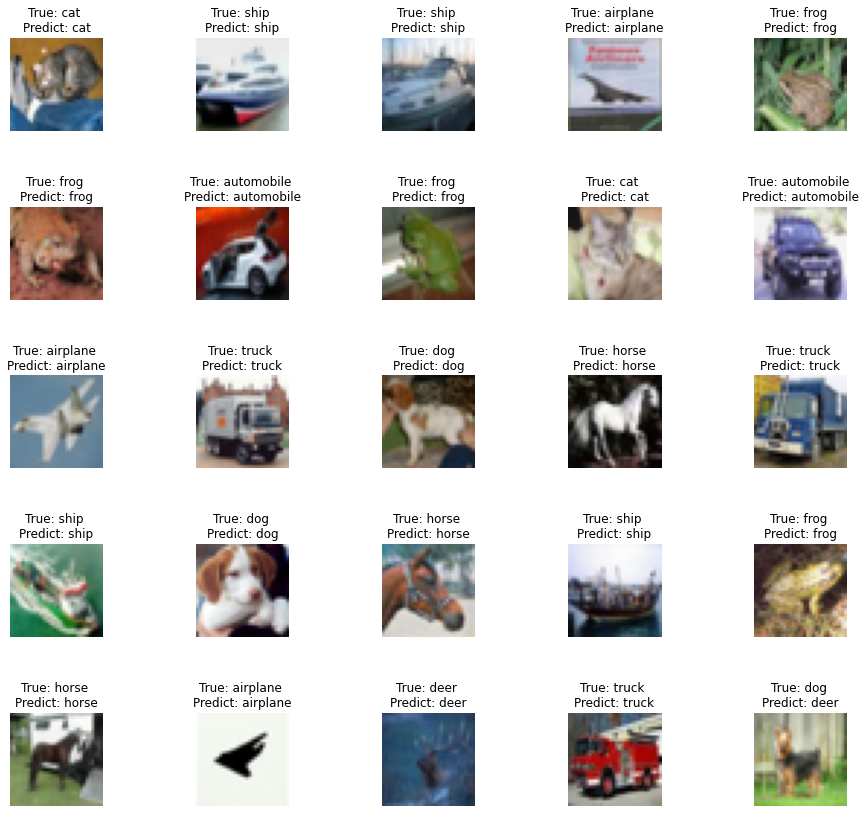

In [16]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)